# MLP
Cell line 05 HUVEC

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was never a learn fail during CV.

MCC mean 0.2545

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 16:51:21.450235


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=5]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14]


2023-04-29 16:51:23.297034
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 1680
Num RCI: 1680
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 1680 sequences.

Training # 1 1
2023-04-29 16:51:29.258938
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-0.1356662867623169, -3.1172671912069685]
Variances [1.90562654 2.50074185]
Priors [0.58198821 0.41801179]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 822:504 61.99%
Computed class weights: {0: 1.3154761904761905, 1: 0.8065693430656934}
Valid 1:0 207:147 58.47%
FIT


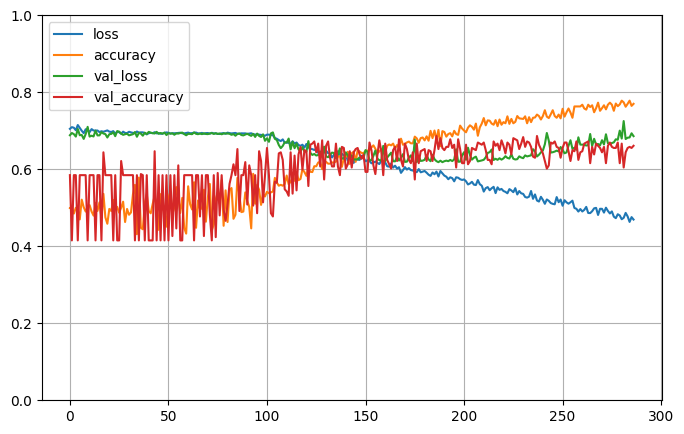


Testing # 1 1
2023-04-29 16:52:55.779600
PREDICT
Test 1:0 207:147 58.47%
Predict 1:0 270:84 76.27%
Test sizes (354, 1025) (354,)
Distrib of scores: 0.6232404 mean 0.17877409 std
Range of scores: 0.07596353 to 0.9378917
Score threshold 0.5
Confusion matrix
 [[ 60  87]
 [ 24 183]]
Normalized matrix
 [[0.16949153 0.24576271]
 [0.06779661 0.51694915]]
Extreme scores correct, pos:neg 109 19
Extreme scores incorrect pos:neg 39 6


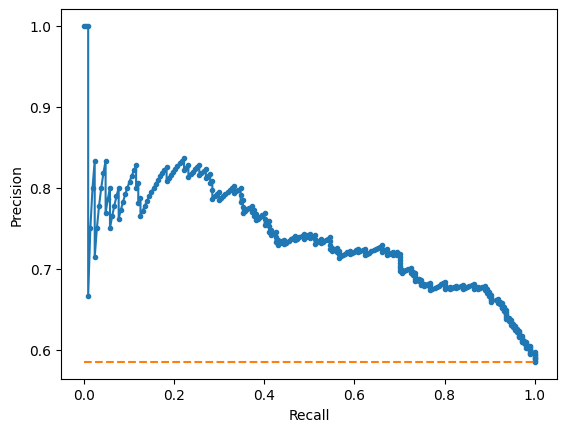

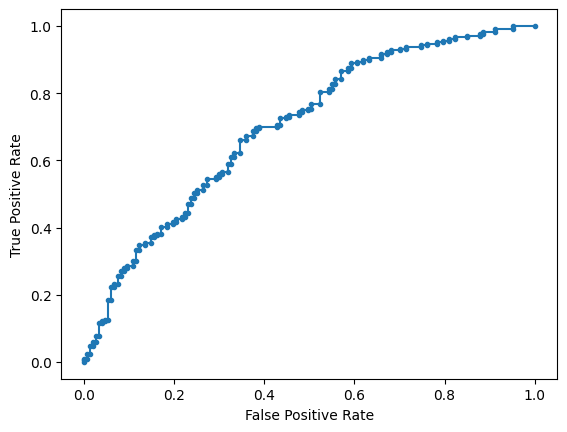

Accuracy: 68.64% Precision: 67.78% Recall: 88.41%
F1: 76.73% MCC: 0.3385
AUPRC: 73.87% AUROC: 70.03%
 accuracy [68.64406779661016]
 precision [67.77777777777779]
 recall [88.40579710144928]
 F1 [76.72955974842768]
 MCC [0.33848083899531356]
 AUPRC [73.87132614775804]
 AUROC [70.02859114660357]

Training # 1 2
2023-04-29 16:52:56.437366
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-0.20311434847120366, -3.13056062699711]
Variances [1.95149782 2.57923851]
Priors [0.58215927 0.41784073]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 830:511 61.89%
Computed class weights: {0: 1.312133072407045, 1: 0.8078313253012048}
Valid 1:0 217:122 64.01%
FIT


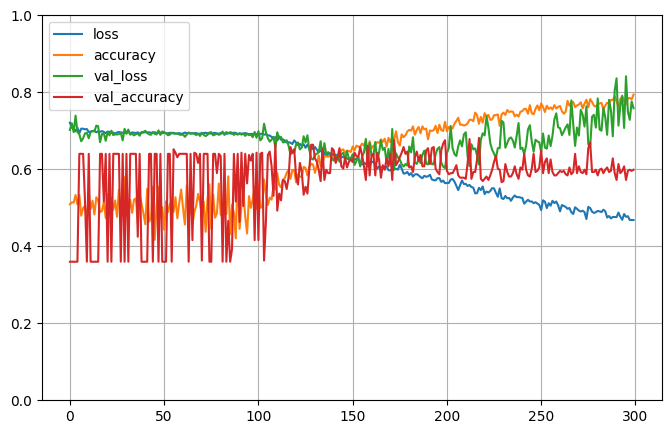


Testing # 1 2
2023-04-29 16:54:09.827945
PREDICT
Test 1:0 217:122 64.01%
Predict 1:0 195:144 57.52%
Test sizes (339, 1025) (339,)
Distrib of scores: 0.53523153 mean 0.28548265 std
Range of scores: 0.00063683727 to 0.96910375
Score threshold 0.5
Confusion matrix
 [[ 65  57]
 [ 79 138]]
Normalized matrix
 [[0.19174041 0.16814159]
 [0.23303835 0.40707965]]
Extreme scores correct, pos:neg 108 48
Extreme scores incorrect pos:neg 39 54


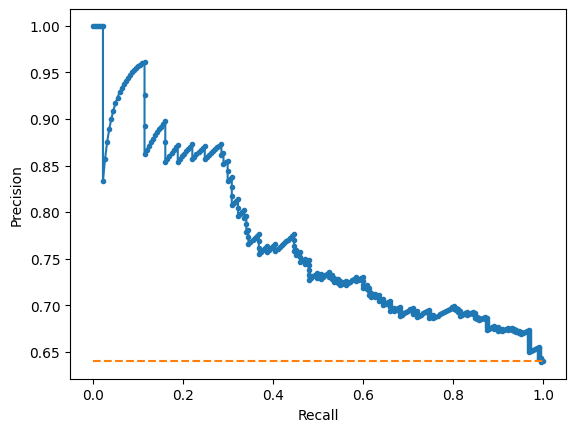

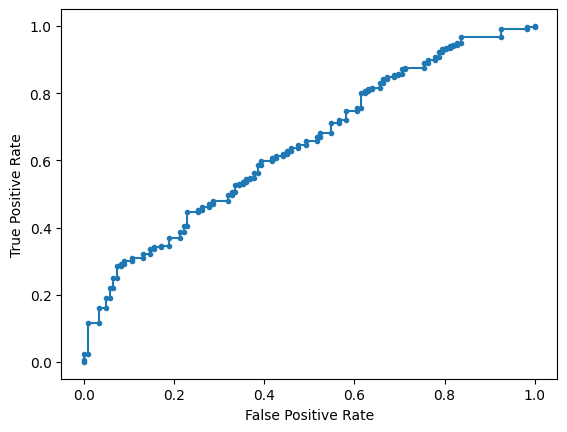

Accuracy: 59.88% Precision: 70.77% Recall: 63.59%
F1: 66.99% MCC: 0.1638
AUPRC: 77.01% AUROC: 64.58%
 accuracy [59.882005899705014]
 precision [70.76923076923077]
 recall [63.594470046082954]
 F1 [66.99029126213593]
 MCC [0.16383535197041424]
 AUPRC [77.0122464316011]
 AUROC [64.58034297801618]

Training # 1 3
2023-04-29 16:54:10.450840
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [-0.13967871506767351, -3.15363172416192]
Variances [1.90102625 2.59858825]
Priors [0.58295164 0.41704836]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 828:516 61.61%
Computed class weights: {0: 1.302325581395349, 1: 0.8115942028985508}
Valid 1:0 207:129 61.61%
FIT


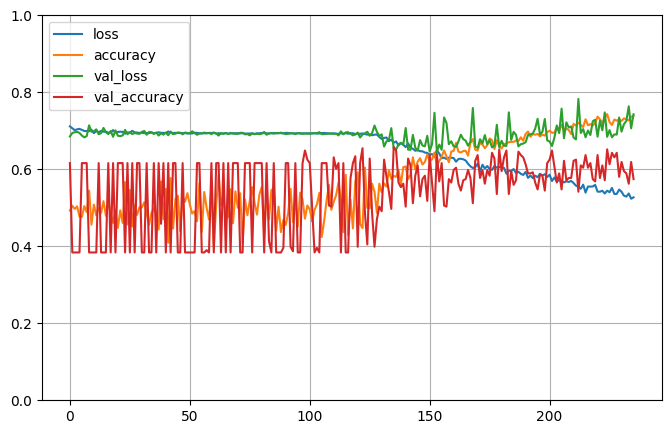


Testing # 1 3
2023-04-29 16:55:34.780410
PREDICT
Test 1:0 207:129 61.61%
Predict 1:0 244:92 72.62%
Test sizes (336, 1025) (336,)
Distrib of scores: 0.5475934 mean 0.07075338 std
Range of scores: 0.41388568 to 0.772474
Score threshold 0.5
Confusion matrix
 [[ 53  76]
 [ 39 168]]
Normalized matrix
 [[0.1577381  0.22619048]
 [0.11607143 0.5       ]]
Extreme scores correct, pos:neg 30 0
Extreme scores incorrect pos:neg 7 0


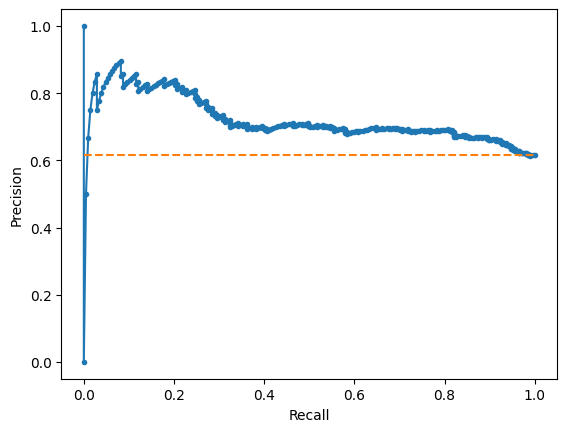

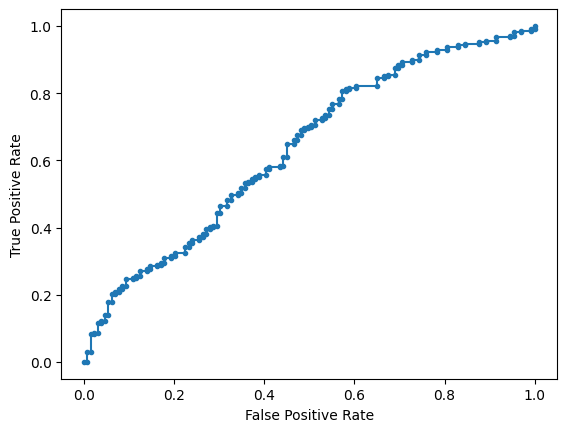

Accuracy: 65.77% Precision: 68.85% Recall: 81.16%
F1: 74.50% MCC: 0.2426
AUPRC: 71.97% AUROC: 63.53%
 accuracy [65.77380952380952]
 precision [68.85245901639344]
 recall [81.15942028985508]
 F1 [74.50110864745011]
 MCC [0.24261496763091978]
 AUPRC [71.96570581718761]
 AUROC [63.5284424970977]

Training # 1 4
2023-04-29 16:55:35.366287
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [-3.011086941647891, -0.021354638295382814]
Variances [2.50743543 1.81150379]
Priors [0.44880155 0.55119845]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 774:570 57.59%
Computed class weights: {0: 1.1789473684210525, 1: 0.8682170542635659}
Valid 1:0 191:145 56.85%
FIT


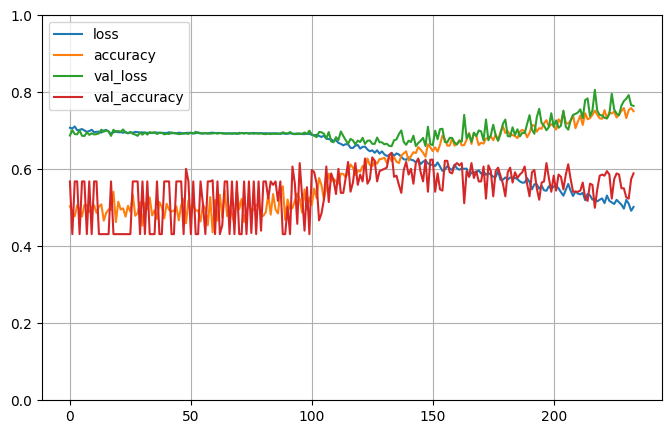


Testing # 1 4
2023-04-29 16:56:31.728433
PREDICT
Test 1:0 191:145 56.85%
Predict 1:0 217:119 64.58%
Test sizes (336, 1025) (336,)
Distrib of scores: 0.5607854 mean 0.12122432 std
Range of scores: 0.3110175 to 0.8976189
Score threshold 0.5
Confusion matrix
 [[ 72  73]
 [ 47 144]]
Normalized matrix
 [[0.21428571 0.2172619 ]
 [0.13988095 0.42857143]]
Extreme scores correct, pos:neg 55 0
Extreme scores incorrect pos:neg 19 1


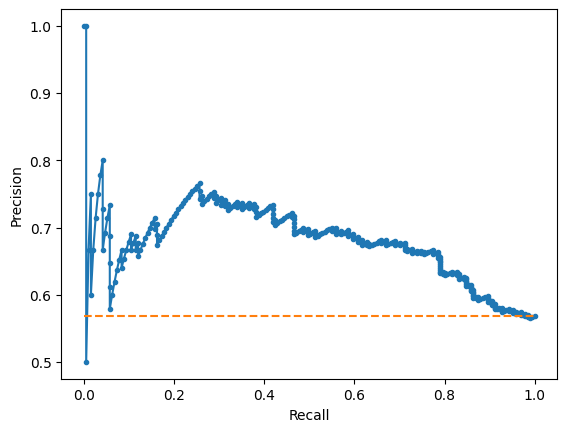

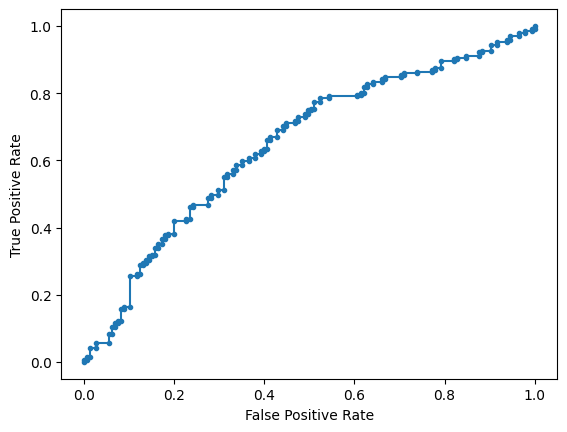

Accuracy: 64.29% Precision: 66.36% Recall: 75.39%
F1: 70.59% MCC: 0.2594
AUPRC: 67.86% AUROC: 64.86%
 accuracy [64.28571428571429]
 precision [66.3594470046083]
 recall [75.39267015706807]
 F1 [70.58823529411764]
 MCC [0.2593986204951424]
 AUPRC [67.85954569347822]
 AUROC [64.8600830474815]

Training # 1 5
2023-04-29 16:56:32.508844
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-0.1507519082832931, -3.12729108965635]
Variances [1.88645362 2.48623443]
Priors [0.58312965 0.41687035]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 837:528 61.32%
Computed class weights: {0: 1.2926136363636365, 1: 0.8154121863799283}
Valid 1:0 195:120 61.90%
FIT


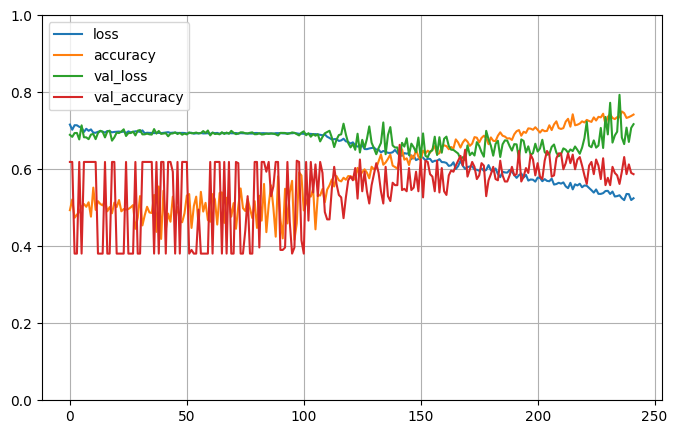


Testing # 1 5
2023-04-29 16:57:34.196547
PREDICT
Test 1:0 195:120 61.90%
Predict 1:0 255:60 80.95%
Test sizes (315, 1025) (315,)
Distrib of scores: 0.60028255 mean 0.12052185 std
Range of scores: 0.3607158 to 0.91137075
Score threshold 0.5
Confusion matrix
 [[ 37  83]
 [ 23 172]]
Normalized matrix
 [[0.11746032 0.26349206]
 [0.07301587 0.54603175]]
Extreme scores correct, pos:neg 70 0
Extreme scores incorrect pos:neg 20 0


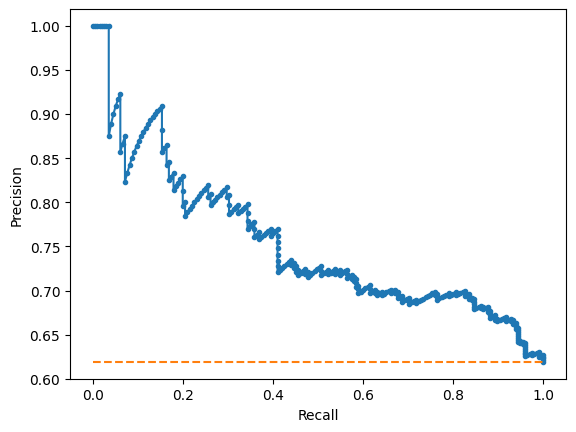

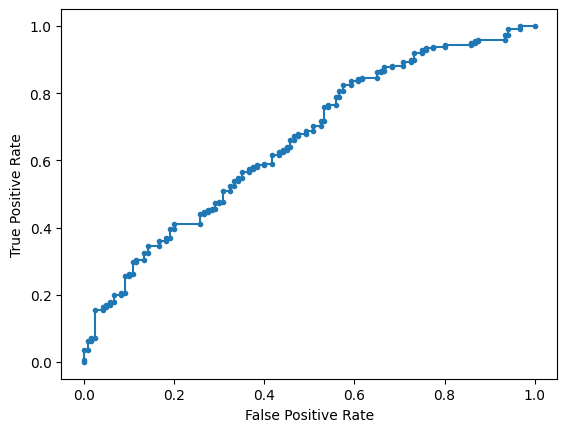

Accuracy: 66.35% Precision: 67.45% Recall: 88.21%
F1: 76.44% MCC: 0.2354
AUPRC: 75.32% AUROC: 65.74%
 accuracy [66.34920634920634]
 precision [67.45098039215686]
 recall [88.2051282051282]
 F1 [76.44444444444444]
 MCC [0.23544748960647457]
 AUPRC [75.31859334887913]
 AUROC [65.73931623931624]

Training # 2 1
2023-04-29 16:57:34.858157
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-3.0391999778857213, -0.10384348150454982]
Variances [2.58590786 1.92849937]
Priors [0.4309519 0.5690481]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 805:532 60.21%
Computed class weights: {0: 1.256578947368421, 1: 0.8304347826086956}
Valid 1:0 203:140 59.18%
FIT


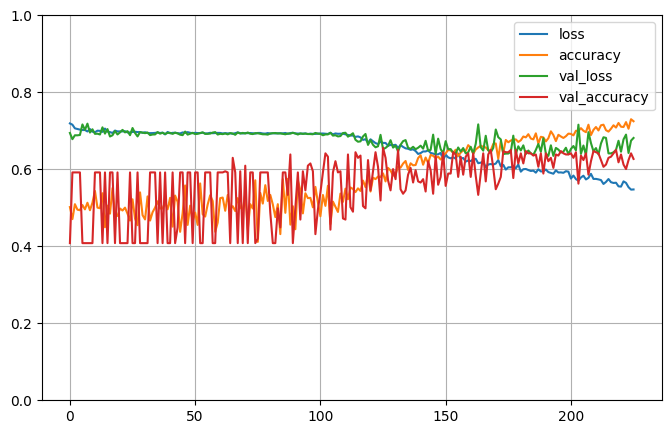


Testing # 2 1
2023-04-29 16:58:58.833970
PREDICT
Test 1:0 203:140 59.18%
Predict 1:0 267:76 77.84%
Test sizes (343, 1025) (343,)
Distrib of scores: 0.56797886 mean 0.08570795 std
Range of scores: 0.4103887 to 0.80439967
Score threshold 0.5
Confusion matrix
 [[ 49  91]
 [ 27 176]]
Normalized matrix
 [[0.14285714 0.26530612]
 [0.0787172  0.51311953]]
Extreme scores correct, pos:neg 48 0
Extreme scores incorrect pos:neg 20 0


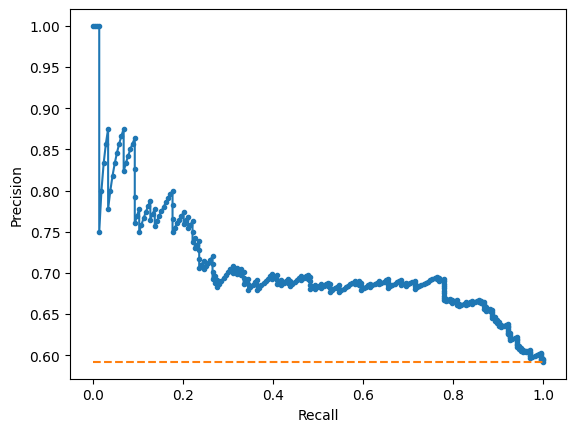

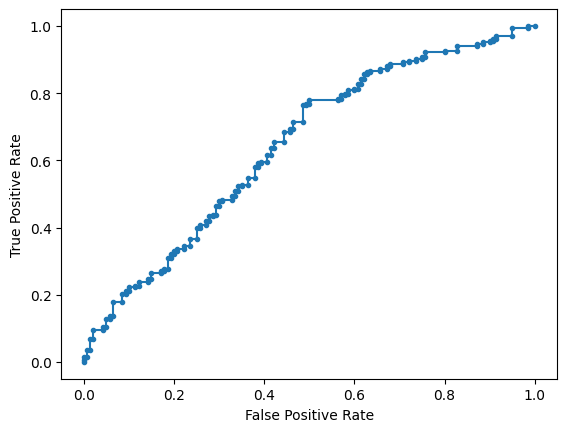

Accuracy: 65.60% Precision: 65.92% Recall: 86.70%
F1: 74.89% MCC: 0.2568
AUPRC: 70.58% AUROC: 64.49%
 accuracy [65.59766763848397]
 precision [65.91760299625467]
 recall [86.69950738916256]
 F1 [74.8936170212766]
 MCC [0.2568026404283464]
 AUPRC [70.57986027030896]
 AUROC [64.4933145672062]

Training # 2 2
2023-04-29 16:58:59.422341
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-0.15187695232918683, -3.091674519643054]
Variances [1.94221843 2.5745244 ]
Priors [0.57894759 0.42105241]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 834:521 61.55%
Computed class weights: {0: 1.300383877159309, 1: 0.8123501199040767}
Valid 1:0 195:130 60.00%
FIT


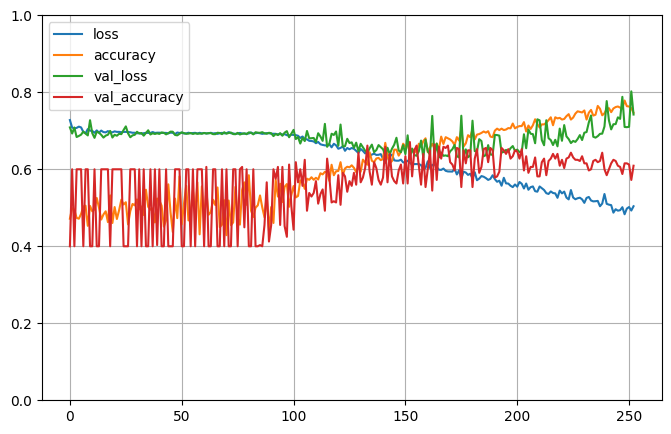


Testing # 2 2
2023-04-29 17:00:00.052606
PREDICT
Test 1:0 195:130 60.00%
Predict 1:0 248:77 76.31%
Test sizes (325, 1025) (325,)
Distrib of scores: 0.6094457 mean 0.14100616 std
Range of scores: 0.30222046 to 0.9140883
Score threshold 0.5
Confusion matrix
 [[ 50  80]
 [ 27 168]]
Normalized matrix
 [[0.15384615 0.24615385]
 [0.08307692 0.51692308]]
Extreme scores correct, pos:neg 85 5
Extreme scores incorrect pos:neg 36 1


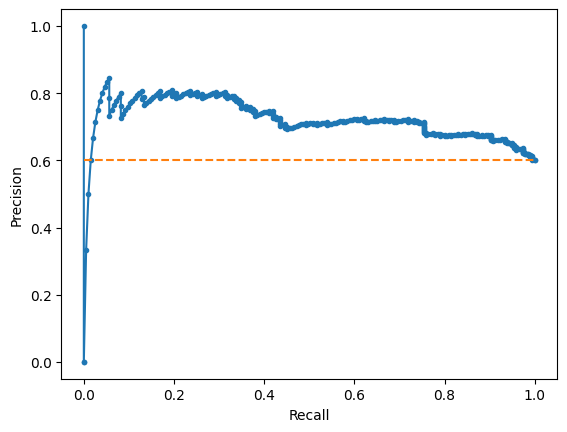

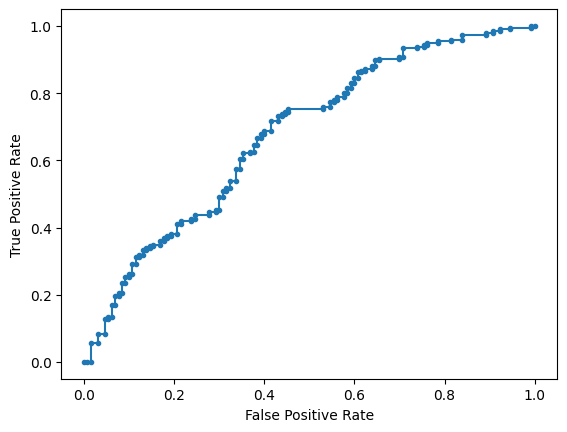

Accuracy: 67.08% Precision: 67.74% Recall: 86.15%
F1: 75.85% MCC: 0.2836
AUPRC: 72.16% AUROC: 67.72%
 accuracy [67.07692307692308]
 precision [67.74193548387096]
 recall [86.15384615384616]
 F1 [75.84650112866818]
 MCC [0.28361187094146667]
 AUPRC [72.15557124029002]
 AUROC [67.71597633136095]

Training # 2 3
2023-04-29 17:00:00.892002
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-3.075805482956221, -0.15785807008645017]
Variances [2.51772191 1.85588529]
Priors [0.43480601 0.56519399]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 807:544 59.73%
Computed class weights: {0: 1.2417279411764706, 1: 0.8370508054522925}
Valid 1:0 209:120 63.53%
FIT


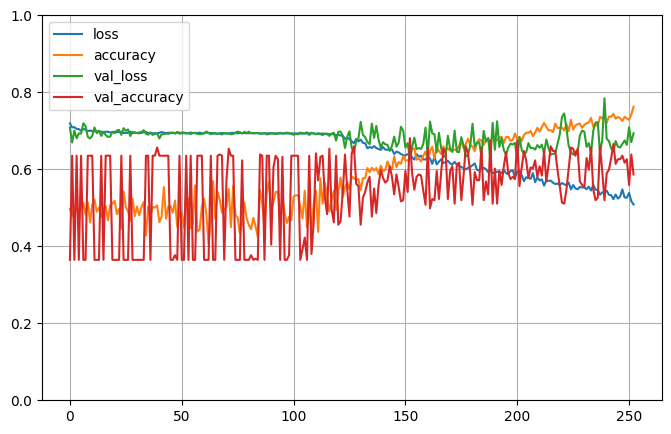


Testing # 2 3
2023-04-29 17:01:07.058572
PREDICT
Test 1:0 209:120 63.53%
Predict 1:0 256:73 77.81%
Test sizes (329, 1025) (329,)
Distrib of scores: 0.5961352 mean 0.1252679 std
Range of scores: 0.31836185 to 0.919521
Score threshold 0.5
Confusion matrix
 [[ 44  76]
 [ 29 180]]
Normalized matrix
 [[0.1337386  0.23100304]
 [0.0881459  0.54711246]]
Extreme scores correct, pos:neg 70 2
Extreme scores incorrect pos:neg 22 1


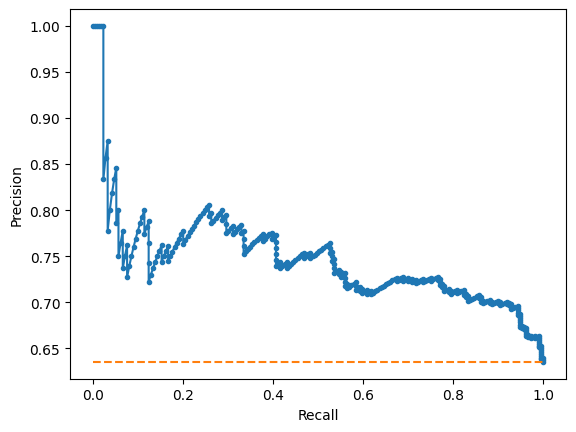

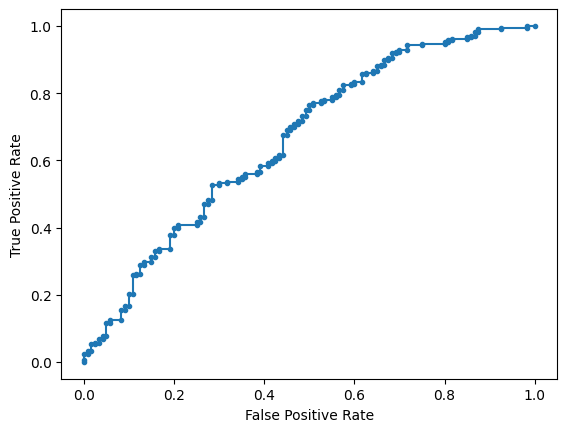

Accuracy: 68.09% Precision: 70.31% Recall: 86.12%
F1: 77.42% MCC: 0.2640
AUPRC: 74.63% AUROC: 66.26%
 accuracy [68.08510638297872]
 precision [70.3125]
 recall [86.1244019138756]
 F1 [77.41935483870968]
 MCC [0.26402620982128233]
 AUPRC [74.62721939019012]
 AUROC [66.2639553429027]

Training # 2 4
2023-04-29 17:01:07.702340
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [-0.17731030211659216, -3.3411778216616015]
Variances [1.94950252 2.48256333]
Priors [0.6129458 0.3870542]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Train 1:0 854:477 64.16%
Computed class weights: {0: 1.3951781970649895, 1: 0.7792740046838408}
Valid 1:0 219:130 62.75%
FIT


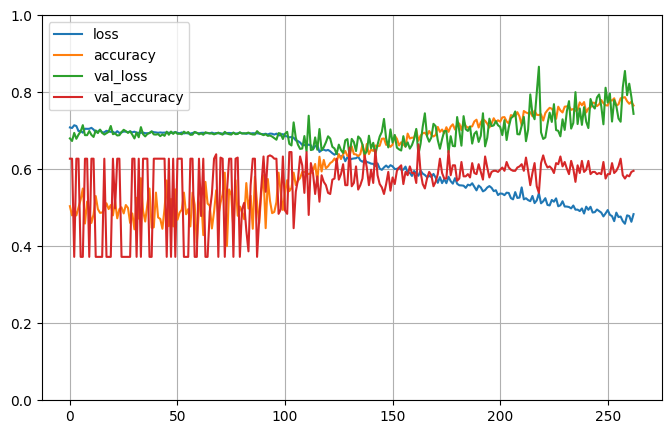


Testing # 2 4
2023-04-29 17:02:31.947790
PREDICT
Test 1:0 219:130 62.75%
Predict 1:0 284:65 81.38%
Test sizes (349, 1025) (349,)
Distrib of scores: 0.65014726 mean 0.16380748 std
Range of scores: 0.21216272 to 0.9352202
Score threshold 0.5
Confusion matrix
 [[ 39  91]
 [ 26 193]]
Normalized matrix
 [[0.11174785 0.26074499]
 [0.07449857 0.5530086 ]]
Extreme scores correct, pos:neg 123 8
Extreme scores incorrect pos:neg 48 4


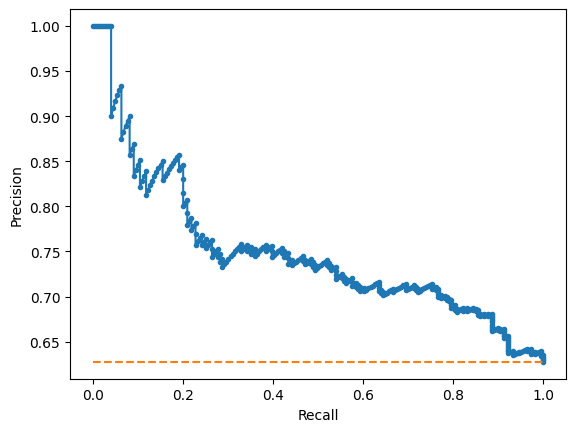

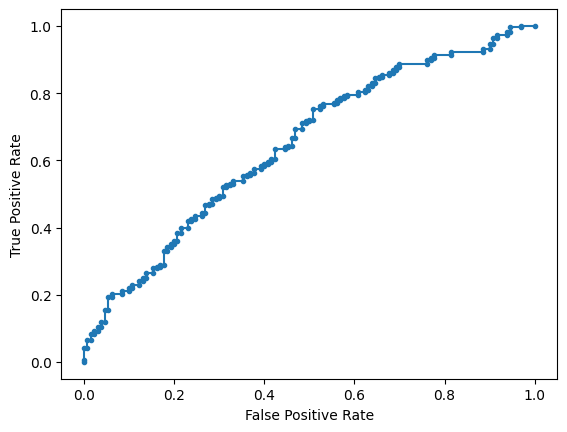

Accuracy: 66.48% Precision: 67.96% Recall: 88.13%
F1: 76.74% MCC: 0.2251
AUPRC: 74.89% AUROC: 64.53%
 accuracy [66.4756446991404]
 precision [67.95774647887323]
 recall [88.12785388127854]
 F1 [76.73956262425448]
 MCC [0.22512528578967836]
 AUPRC [74.8924868760362]
 AUROC [64.52757288373726]

Training # 2 5
2023-04-29 17:02:32.572465
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [-0.10464421565984415, -3.080680499237683]
Variances [1.83116714 2.39390817]
Priors [0.57395248 0.42604752]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 809:537 60.10%
Computed class weights: {0: 1.2532588454376163, 1: 0.8318912237330037}
Valid 1:0 201:133 60.18%
FIT


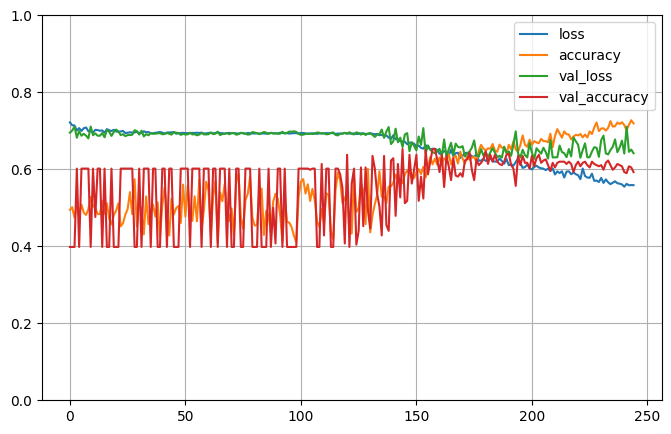


Testing # 2 5
2023-04-29 17:03:57.071433
PREDICT
Test 1:0 201:133 60.18%
Predict 1:0 201:133 60.18%
Test sizes (334, 1025) (334,)
Distrib of scores: 0.52795756 mean 0.06996036 std
Range of scores: 0.38985166 to 0.74526215
Score threshold 0.5
Confusion matrix
 [[ 75  58]
 [ 58 143]]
Normalized matrix
 [[0.2245509  0.17365269]
 [0.17365269 0.42814371]]
Extreme scores correct, pos:neg 19 0
Extreme scores incorrect pos:neg 4 0


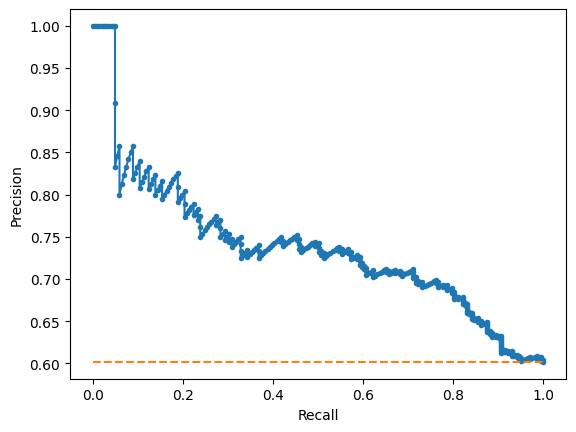

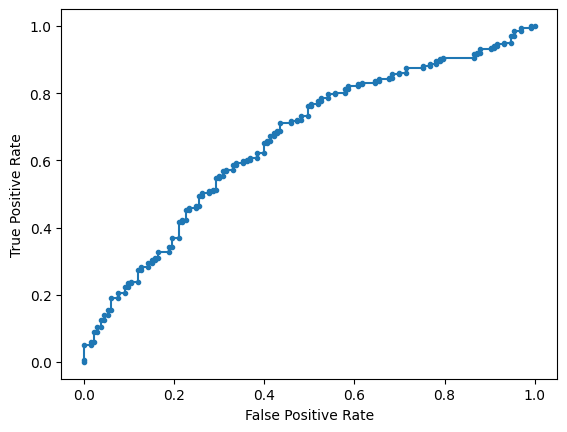

Accuracy: 65.27% Precision: 71.14% Recall: 71.14%
F1: 71.14% MCC: 0.2754
AUPRC: 73.75% AUROC: 65.87%
 accuracy [65.26946107784431]
 precision [71.14427860696517]
 recall [71.14427860696517]
 F1 [71.14427860696517]
 MCC [0.275352560505742]
 AUPRC [73.7488301135978]
 AUROC [65.86615793214379]
2023-04-29 17:03:57.983704


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 65.74% std 2.43
 precision mean 68.43% std 1.80
 recall mean 81.50% std 8.64
 F1 mean 74.13% std 3.43
 MCC mean 0.2545 std 0.0448
 AUPRC mean 73.20% std 2.64
 AUROC mean 65.76% std 1.90
 accuracy [[68.64406779661016], [59.882005899705014], [65.77380952380952], [64.28571428571429], [66.34920634920634], [65.59766763848397], [67.07692307692308], [68.08510638297872], [66.4756446991404], [65.26946107784431]]
 precision [[67.77777777777779], [70.76923076923077], [68.85245901639344], [66.3594470046083], [67.45098039215686], [65.91760299625467], [67.74193548387096], [70.3125], [67.95774647887323], [71.14427860696517]]
 recall [[88.40579710144928], [63.594470046082954], [81.15942028985508], [75.39267015706807], [88.2051282051282], [86.69950738916256], [86.15384615384616], [86.1244019138756], [88.12785388127854], [71.14427860696517]]
 F1 [[76.72955974842768], [66.99029126213593], [74.50110864745011], [70.58823529411764], [76.44444444444444], [74.8936170212766], [75.84650112866818]